In [1]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import sys
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
abalone = pd.read_csv("abalone.csv")
#splitting data to train and test
aba_train, aba_test, rings_train, rings_test = train_test_split(abalone, abalone.iloc[:,-1], test_size=0.3, random_state=42)
aba_train = aba_train.iloc[:,:7]
aba_test = aba_test.iloc[:,:7]
aba_train.to_csv("abalone-train.csv",index=False)
aba_test.to_csv("abalone-test.csv",index=False)

Attribute with highest correlation coefficient with rings is :  Shell weight


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


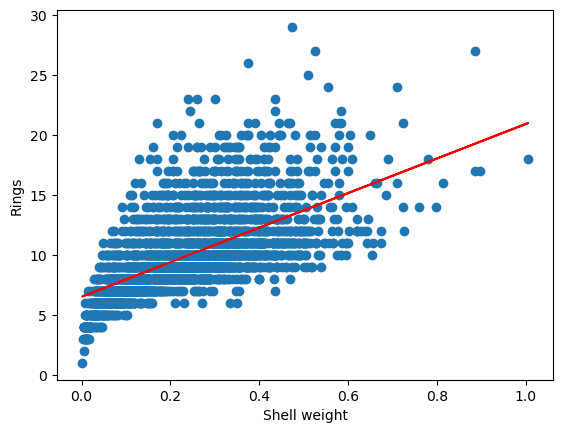

Prediction accuracy on train Data: 2.527846339134725
Prediction accuracy on test Data: 2.467940147010543


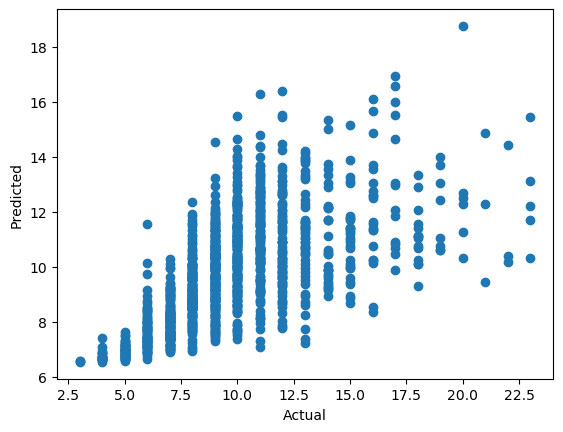

In [3]:
#1)

#finding attribute with highest cvorrelation
corr=0
for i in aba_train.columns:
    corr_ = rings_train.corr(aba_train[i])
    if corr_>corr:
        corr = corr_
        m = i

print("Attribute with highest correlation coefficient with rings is : ",m)

# a
X = np.array(aba_train[m]).reshape(-1,1)
x=np.array(aba_test[m]).reshape(-1,1)
y = np.array(rings_train).reshape(-1,1)

#fitting linear regression model with train data
Y_pred = LinearRegression().fit(X, y).predict(X)
y_pred = LinearRegression().fit(X, y).predict(x)

#plotting scatter plot between best attribute and target attribute
plt.scatter(aba_train[m],rings_train)
#plotting regression line
plt.plot(aba_train[m],Y_pred,c='r')
plt.xlabel(m)
plt.ylabel('Rings')
plt.show()

# b

#finding RMSE betweeen rings test and prediction
rmse1 = np.sqrt(mean_squared_error(rings_train, Y_pred))
print("Prediction accuracy on train Data:", rmse1)

#c
rmse2 = np.sqrt(mean_squared_error(rings_test, y_pred))
print("Prediction accuracy on test Data:", rmse2)

# d
plt.scatter(rings_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Prediction accuracy on train Data: 2.216182487730409
Prediction accuracy on test Data: 2.2192193506637916


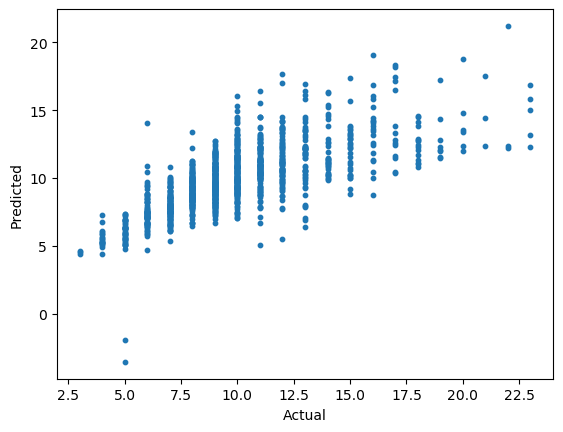

In [4]:
# Q2

# a
#fitting multivariate linear regression
reg_mul = LinearRegression().fit(aba_train, y)
train_pred_mul = reg_mul.predict(aba_train)
test_pred_mul = reg_mul.predict(aba_test)

#b

#calculating rmse of predicted data
RMSE_1 = np.sqrt(mean_squared_error(rings_train, train_pred_mul))
RMSE_2 = np.sqrt(mean_squared_error(rings_test, test_pred_mul))
print("Prediction accuracy on train Data:", RMSE_1)
print("Prediction accuracy on test Data:", RMSE_2)

# c

#plotting scatter plot between test and prediction
plt.scatter(rings_test, test_pred_mul, s=10)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

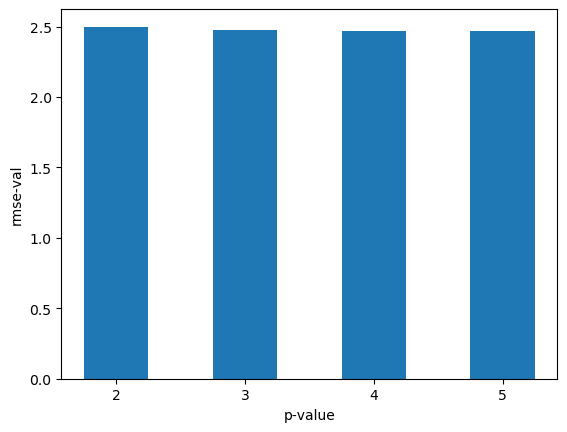

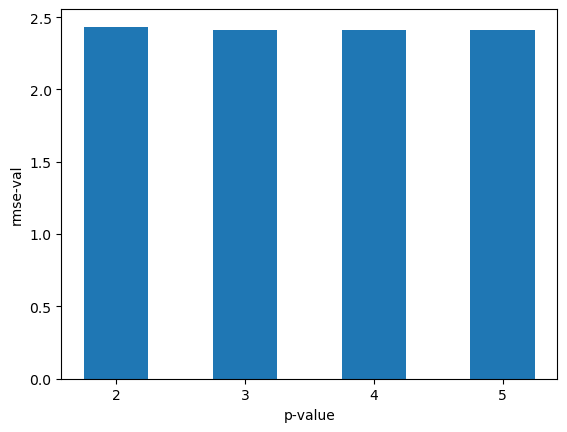

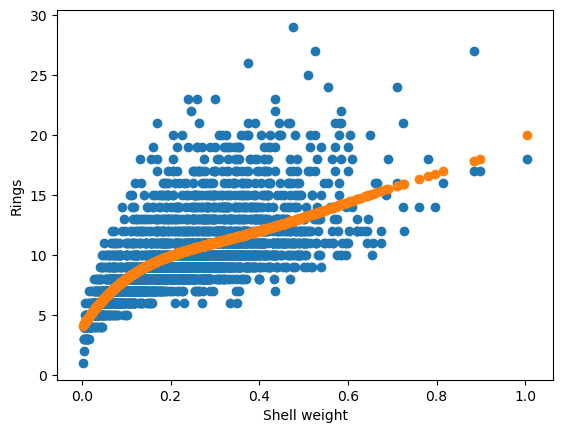

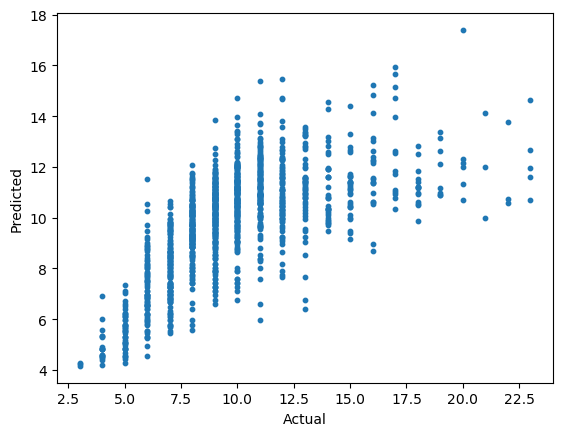

In [5]:
#Q3


from sklearn.preprocessing import PolynomialFeatures
list1 = []
list2 = []
for p in [2,3,4,5]:
    
    #fitting polynomial with p degree
    poly_features = PolynomialFeatures(p)
    x_poly_train = poly_features.fit_transform(np.array(aba_train[m]).reshape(-1,1))
    x_poly_test = poly_features.fit_transform(np.array(aba_test[m]).reshape(-1,1))

    regressor_uni = LinearRegression()
    
    regressor_uni.fit(x_poly_train, rings_train)

    y_poly_uni_train = regressor_uni.predict(x_poly_train)
    y_poly_uni_test = regressor_uni.predict(x_poly_test)

    RMSE1 = np.sqrt(mean_squared_error(rings_train, y_poly_uni_train))
    RMSE2 = np.sqrt(mean_squared_error(rings_test, y_poly_uni_test))

    list1.append(RMSE1)
    list2.append(RMSE2)

#a
plt.bar([2,3,4,5],list1,width=0.5)
plt.xlabel('p-value')
plt.ylabel('rmse-val')
plt.xticks([2,3,4,5])
plt.show()
#b
plt.bar([2,3,4,5],list2,width=0.5)
plt.xlabel('p-value')
plt.ylabel('rmse-val')
plt.xticks([2,3,4,5])
plt.show()
#c
minimum = list1.index(min(list1))
min_val = [2,3,4,5][minimum]
poly_features = PolynomialFeatures(min_val)

x_poly_train = poly_features.fit_transform(np.array(aba_train[m]).reshape(-1,1))
x_poly_test = poly_features.fit_transform(np.array(aba_test[m]).reshape(-1,1))

regressor_uni.fit(x_poly_train, rings_train)
y_poly_uni_train = regressor_uni.predict(x_poly_train)
y_poly_uni_test = regressor_uni.predict(x_poly_test)
plt.scatter(aba_train[m],rings_train)
#plotting predicted line
plt.scatter(aba_train[m],y_poly_uni_train)
plt.xlabel(m)
plt.ylabel('Rings')
plt.show()

#d
plt.scatter(rings_test, y_poly_uni_test, s=10)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

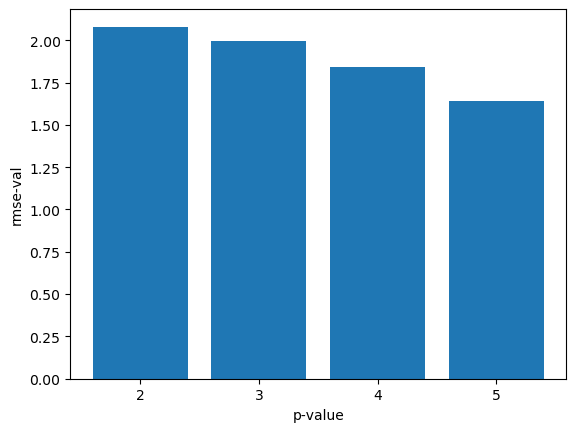

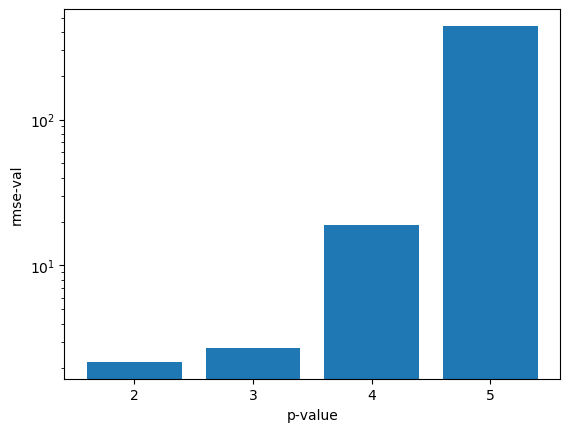

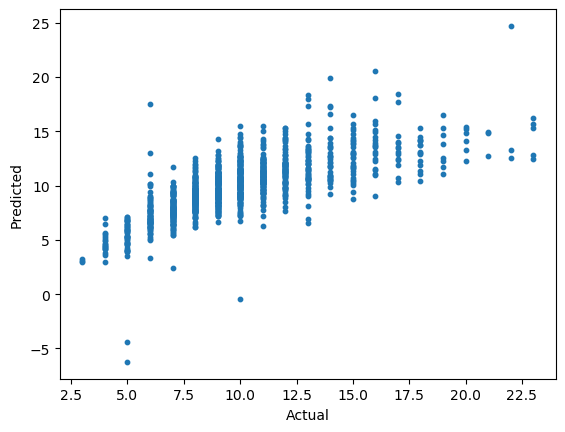

In [6]:
#Q4

list3 = []
list4 = []
for p in [2,3,4,5]:
    poly_features = PolynomialFeatures(p)
    x_poly_train = poly_features.fit_transform(aba_train)
    x_poly_test = poly_features.fit_transform(aba_test)

    regressor_mul = LinearRegression()
    regressor_mul.fit(x_poly_train,  rings_train)
    
    y_poly_mul_train= regressor_mul.predict(x_poly_train)
    y_poly_mul_test= regressor_mul.predict(x_poly_test)

    RMSE3 = np.sqrt(mean_squared_error(rings_train, y_poly_mul_train))
    RMSE4 = np.sqrt(mean_squared_error(rings_test, y_poly_mul_test))

    list3.append(RMSE3)
    list4.append(RMSE4)
    
    
# q4 part a
plt.bar([2,3,4,5],list3)
plt.xlabel('p-value')
plt.ylabel('rmse-val')
plt.xticks([2,3,4,5])
plt.show()
# q4 part b
plt.bar([2,3,4,5],list4)
plt.yscale('log')
plt.xlabel('p-value')
plt.ylabel('rmse-val')
plt.xticks([2,3,4,5])
plt.show()
# q4 part c
minimum=list4.index(min(list4))
val = [2,3,4,5][minimum]
poly_features = PolynomialFeatures(val)

x_poly_train = poly_features.fit_transform(aba_train)
x_poly_test = poly_features.fit_transform(aba_test)

regressor_mul.fit(x_poly_train, rings_train)
y_poly_mulpred_test = regressor_mul.predict(x_poly_test)
plt.scatter(rings_test, y_poly_mulpred_test, s=10)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()